In [ ]:
# 1. Data cleaning

In [ ]:
# Clean the data file by removing non-text (e.g. emojis, smart quotes) and regularizing text 
#(e.g. tokenization, lower casing, stemming, lemmatizing, POS tagging, stop word removal, removing punctuation, spelling correction)
import demoji
import json
import spacy
from spacy.lang.en import English
from spellchecker import SpellChecker
from nltk.stem.porter import PorterStemmer

path= "faqsFromPdf - Copy.json"
with open(path, 'r') as json_file:
    text = json.load(json_file)

categories = []
all_text = ""
for key, faq_list in text.items():
    group_text = ""

    for faq_item in faq_list:
        all_text += faq_item["question"] + " " + faq_item["answer"] + " "
        group_text += faq_item["question"] + faq_item["answer"] 
    categories.append(group_text)

# Removing emojis
clean_text = demoji.replace(all_text,"")
#remove smart quotes
clean_text = clean_text.replace("“", "\"").replace("”","\"")
# convert text to lower-case
clean_text = clean_text.lower()

spell = SpellChecker()
stemmer = PorterStemmer()

# Find and correct spelling errors
corrected_text = []
clean_text=clean_text.split()
for word in clean_text:
    # Check if the word is misspelled
    if spell.unknown([word]):
        # Get the corrected version of the word
        corrected_word = spell.correction(word)
        # Check if the corrected word is not None
        if corrected_word is not None:
            corrected_text.append(corrected_word)
        else:
            # If the correction is None, keep the original word
            corrected_text.append(word)
    else:
        corrected_text.append(word)
# Join the corrected words back into a string
corrected_text = " ".join(corrected_text)   

#Tokenzing using Spacy with removing white spaces, stop words, and punctuations
nlp = spacy.load('en_core_web_sm')
doc = nlp(corrected_text)

# Lemmatize and stem the words
lemmatized_and_stemmed_words = []
for token in doc:
    lemma = token.lemma_
    stem = stemmer.stem(token.text)  # Use Porter Stemmer
    lemmatized_and_stemmed_words.append((token.text, lemma, stem))

clean_words = [token.text for token in doc if not (token.is_space or token.is_stop or token.is_punct)]
posArray = [(token.text, token.pos_) for token in doc if not (token.is_space or token.is_stop or token.is_punct)]

# print(clean_words)
with open("cleaned_data.txt", "w", encoding='utf-8') as txt_file:
     txt_file.write(str(clean_words))

In [ ]:
# 2. Performing a binary classification related to housing or not

In [21]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load JSON data
path = "faqsFromPdf - Copy.json"
with open(path, 'r') as file:
    data = json.load(file)

# Extract questions and labels
questions = []
labels = []

# Modify the label generation to ensure binary labels
for category, faqs in data.items():
    for faq in faqs:
        questions.append(faq['question'])
        labels.append(1 if 'Housing' in category else 0)
print(labels)
print(len(labels))
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(questions, labels, test_size=0.2, random_state=42)

# Create a CountVectorizer to convert text into a numerical format
vectorizer = CountVectorizer()

# Fit the vectorizer on the training data and transform the data
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Convert the data to NumPy arrays
X_train_array = X_train_vectorized.toarray()
X_test_array = X_test_vectorized.toarray()

# Convert labels to NumPy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

# Number of features (words)
input_dimension = X_train_array.shape[1]
print(input_dimension)

# Create a Sequential model
model = Sequential()
model.add(Dense(16, input_dim=input_dimension, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Use a single output unit for binary classification

# summarize the model to make sure that it's structured as intended
model.summary()

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model with binary labels
history = model.fit(X_train_array, y_train, epochs=20, verbose=True, validation_data=(X_test_array, y_test), batch_size=10)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [22]:
from keras.backend import clear_session
# clear states generated by Keras to reduce memory usage
clear_session()

In [23]:
loss, accuracy = model.evaluate(X_train_array, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test_array, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Testing Accuracy:  0.9783


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 16)                15296     
                                                                 
 dense_24 (Dense)            (None, 16)                272       
                                                                 
 dense_25 (Dense)            (None, 16)                272       
                                                                 
 dense_26 (Dense)            (None, 1)                 17        
                                                                 
Total params: 15857 (61.94 KB)
Trainable params: 15857 (61.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


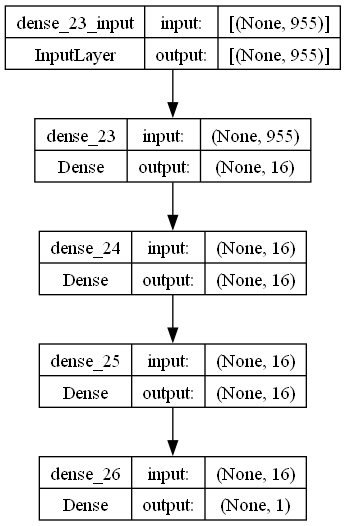

In [24]:
print(model.summary())
from tensorflow.keras.utils import plot_model
#visualize the model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [25]:
#%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training accuracy')
    plt.plot(x, val_acc, 'r', label = 'Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend(fontsize = 14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    #plt.savefig('acc.svg')
    #plt.show()
    
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend(fontsize = 14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.savefig('loss.svg')
    plt.show()
   

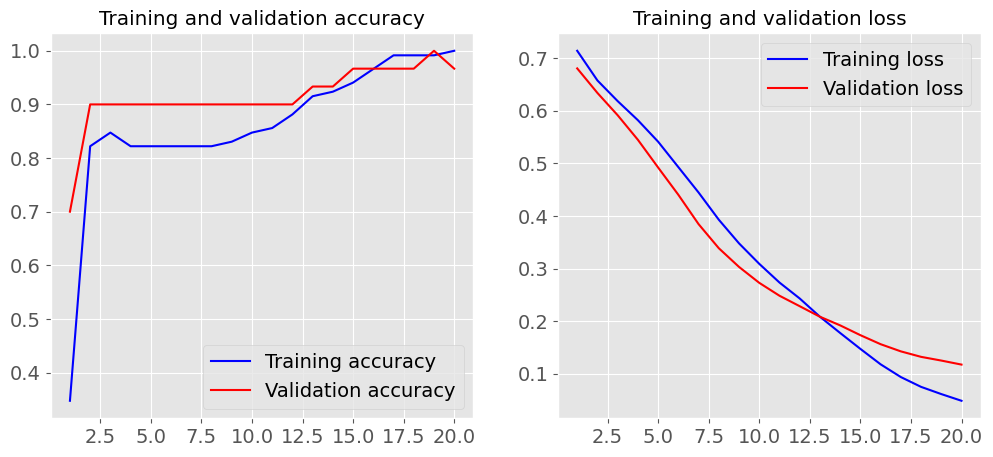

In [13]:
plot_history(history)

In [ ]:
#3. Improving performance by modifying hyperparameters

In [ ]:
#a) Increased the number of hidden units in the first hidden layer to 64.
#b) Added an extra hidden layer with 32 units.
#c) Adjusted the learning rate to 0.01 for the Adam optimizer.
#d) Increased the number of training epochs to 30.
#e) Kept the batch size at 32.

In [26]:
# Create a Sequential model with adjustable hyperparameters
model = Sequential()
model.add(Dense(64, input_dim=input_dimension, activation='relu'))  # Increased hidden units
model.add(Dense(32, activation='relu'))  # Added an extra hidden layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model with an adjusted learning rate
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

# Train the model with an adjusted number of epochs
history = model.fit(X_train_array, y_train, epochs=30, verbose=True, validation_data=(X_test_array, y_test), batch_size=32)

Epoch 1/30
35/35 [==============================] - 2s 12ms/step - loss: 0.2080 - accuracy: 0.9393 - val_loss: 0.0832 - val_accuracy: 0.9495
Epoch 2/30
35/35 [==============================] - 0s 9ms/step - loss: 0.0566 - accuracy: 0.9638 - val_loss: 0.0395 - val_accuracy: 0.9892
Epoch 3/30
35/35 [==============================] - 0s 8ms/step - loss: 0.0178 - accuracy: 0.9982 - val_loss: 0.0301 - val_accuracy: 0.9928
Epoch 4/30
35/35 [==============================] - 0s 6ms/step - loss: 0.0078 - accuracy: 0.9982 - val_loss: 0.0480 - val_accuracy: 0.9783
Epoch 5/30
35/35 [==============================] - 0s 6ms/step - loss: 0.0047 - accuracy: 0.9982 - val_loss: 0.0492 - val_accuracy: 0.9783
Epoch 6/30
35/35 [==============================] - 0s 10ms/step - loss: 0.0035 - accuracy: 0.9982 - val_loss: 0.0497 - val_accuracy: 0.9783
Epoch 7/30
35/35 [==============================] - 0s 7ms/step - loss: 0.0027 - accuracy: 0.9982 - val_loss: 0.0479 - val_accuracy: 0.9783
Epoch 8/30
35/35 [

In [27]:
loss, accuracy = model.evaluate(X_train_array, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test_array, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Testing Accuracy:  0.9783


In [ ]:
# Added two dropout layers with dropout rates of 0.3 and 0.2.
# Dropout layers help prevent overfitting by randomly setting a fraction of the input units to 0 during each training epoch

In [29]:
from tensorflow.keras.layers import Dense, Dropout  # Import Dropout layer

# Create a Sequential model with adjustable hyperparameters
model = Sequential()
model.add(Dense(64, input_dim=input_dimension, activation='relu'))
model.add(Dropout(0.3))  # Add a dropout layer with a dropout rate of 0.3
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))  # Add another dropout layer with a dropout rate of 0.2
model.add(Dense(1, activation='sigmoid'))

# Compile the model with adjusted learning rate and loss function
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

# Train the model with an adjusted number of epochs
history = model.fit(X_train_array, y_train, epochs=30, verbose=True, validation_data=(X_test_array, y_test), batch_size=32)

Epoch 1/30
35/35 [==============================] - 1s 8ms/step - loss: 0.2560 - accuracy: 0.9139 - val_loss: 0.1014 - val_accuracy: 0.9495
Epoch 2/30
35/35 [==============================] - 0s 5ms/step - loss: 0.0869 - accuracy: 0.9420 - val_loss: 0.0744 - val_accuracy: 0.9495
Epoch 3/30
35/35 [==============================] - 0s 5ms/step - loss: 0.0539 - accuracy: 0.9611 - val_loss: 0.0492 - val_accuracy: 0.9747
Epoch 4/30
35/35 [==============================] - 0s 7ms/step - loss: 0.0292 - accuracy: 0.9937 - val_loss: 0.0241 - val_accuracy: 0.9928
Epoch 5/30
35/35 [==============================] - 0s 5ms/step - loss: 0.0092 - accuracy: 0.9973 - val_loss: 0.0219 - val_accuracy: 0.9964
Epoch 6/30
35/35 [==============================] - 0s 4ms/step - loss: 0.0074 - accuracy: 0.9982 - val_loss: 0.0237 - val_accuracy: 0.9928
Epoch 7/30
35/35 [==============================] - 0s 5ms/step - loss: 0.0073 - accuracy: 0.9982 - val_loss: 0.0281 - val_accuracy: 0.9819
Epoch 8/30
35/35 [==

In [30]:
loss, accuracy = model.evaluate(X_train_array, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test_array, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Testing Accuracy:  0.9928


## Model Evaluation 

The model did very well - it got **99.28% accuracy** on the testing data. This means it was able to correctly classify almost all of the unseen text data. So it seems to be learning patterns that apply well to new data.

But the training accuracy was **100%** - perfect. This means the model may be **memorizing the small training set** too closely. It's like acing an exam after memorizing the answers, not by understanding the material. 

Adding dropout helped prevent severe overfitting. But there's still a gap between training and testing accuracy.

To better evaluate the model, we need to **test it more thoroughly on larger datasets** and real-world examples. This will check if it truly learned generalizable patterns.

## Summary

- The high testing accuracy is great. It shows the model can classify well. 

- But the perfect training accuracy suggests possible overfitting.

- We need more tests on larger data to confirm the model robustness.

Overall the results look good but more evaluation is needed before we can trust the model's performance fully.

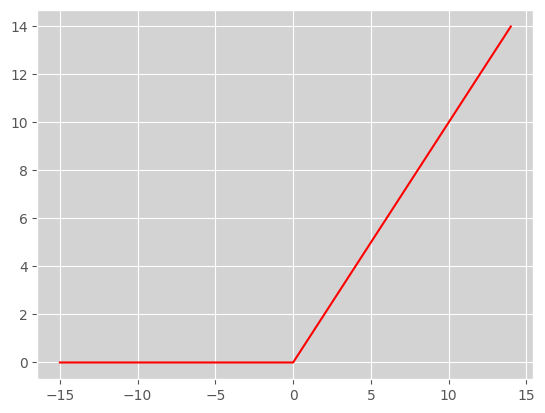

In [6]:
# plot inputs and outputs
from matplotlib import pyplot
 
# rectified linear function
def rectified(x):
 return max(0.0, x)
 
# define a series of inputs
series_in = [x for x in range(-15, 15)]
# calculate outputs for our inputs
series_out = [rectified(x) for x in series_in]
# line plot of raw inputs to rectified outputs
plt.grid(color='white')

# Set the background color to gray
ax = plt.gca()
ax.set_facecolor('lightgray')
pyplot.plot(series_in, series_out, color = "red")
pyplot.show()

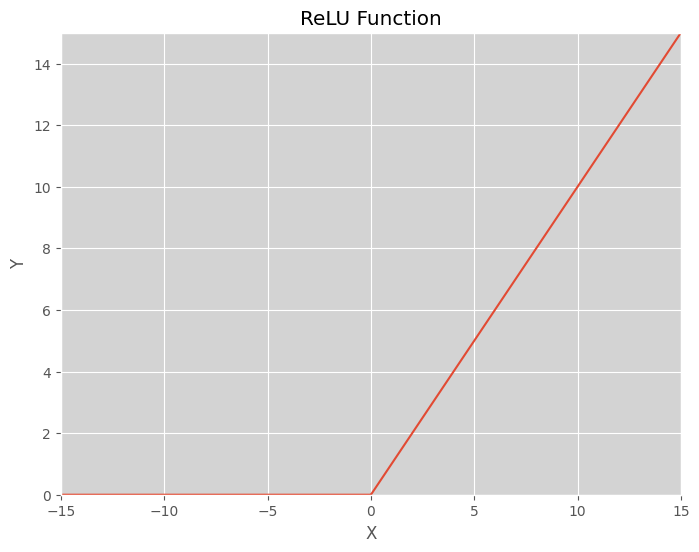

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ReLU function
def relu(x):
    return np.maximum(0, x)

# Generate x values between -15 and 15
x = np.linspace(-15, 15, 500)

# Generate y values using the ReLU function
y = relu(x)

# Set the plot parameters
plt.figure(figsize=(8, 6))
plt.title("ReLU Function")
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim(-15, 15)
plt.ylim(0, 15)
plt.grid(color='white')

# Set the background color to gray
ax = plt.gca()
ax.set_facecolor('lightgray')

# Plot the ReLU function
plt.plot(x, y)

# Show the plot
plt.show()


In [7]:
import numpy as np 
def sig(x):
 return 1/(1 + np.exp(-x))

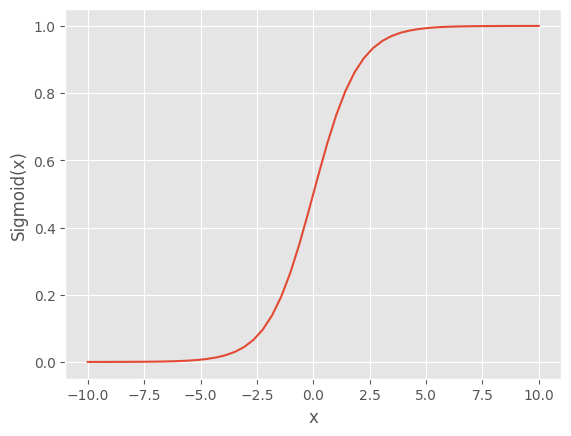

In [56]:
import matplotlib.pyplot as plt
x = np.linspace(-10, 10, 50)   
p = sig(x)
plt.xlabel("x") 
plt.ylabel("Sigmoid(x)")  
plt.plot(x, p) 
plt.show()


# Key Takeawaysy

## Task 1: Data Preprocessing

- Performed preprocessing like removing punctuation, stop words, stemming and lemmatization to clean and normalize text data.
- Data preprocessing is essential for NLP tasks to improve model performance. 

## Task 2: Multi-Layer Perceptron 

- Constructed a MLP model architecture for binary text classification.
- Gained hands-on experience with neural network implementation and training.

## Task 3: Hyperparameter Tuning

- Experimented with hyperparameters like layers, learning rate, epochs to optimize model. 
- Iterative tuning process improveslearning and deep learning.formance on TF-IDF encoded text data. Evaluating them using appropriate metrics highlighted their strengths and weaknesses for this natural language processing problem. The hands-on experience helped to understand different classification approaches for text analysis.n.data.ata.

## Additional Learnings

- Last week tasks helped to implement and compare two machine learning models, Naive Bayes and Support Vector Classifier, for binary text classification. Building both algorithms provided insights into their working and performance on TF-IDF encoded text data.
- Learned how different models perform on text data.
- Evaluated models using relevant metrics like accuracy, precision, recall.

- Data preprocessing, neural network design, hyperparameter tuning are key skills for NLP.
- Knowledge gained is widely applicable across NLP tasks.
- Overall, obtained essential experience with text analytics using machine learning and deep learning.